In [36]:
# Import all necessary libraries.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [37]:
# Load the digits dataset.
digits = load_digits()

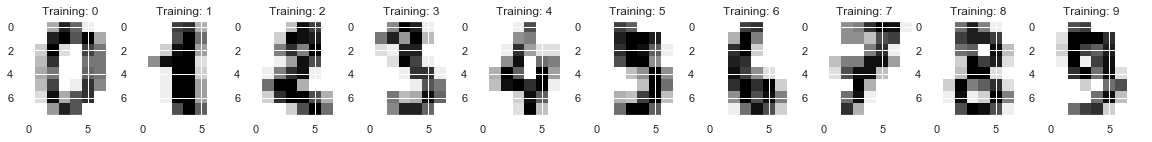

In [38]:
# Plot some digits from the data-set.
plt.figure(figsize=(20, 5))
for i in range(0,10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[i])
plt.show()

In [39]:
# To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [40]:
# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=42)

In [41]:
# Set parameters for grid-search.
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}]

# Instantiate k-NN class.
clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=3, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   18.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [42]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [43]:
grid_search.best_score_

0.9867780097425192

In [44]:
# Prediction.
y_pred = grid_search.predict(x_test)

In [45]:
# Accuracy score.
accuracy_score(y_test, y_pred)

0.9833333333333333

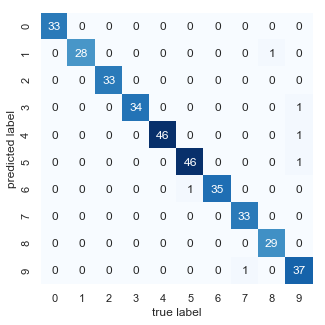

In [46]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

In [47]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

   micro avg       0.98      0.98      0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Observação

Voce também pode encontrar os valores ótimos para os hiperparâmetros com todo o conjunto de dados e após, instanciar um novo classificador com os valores ótimos, treinar com o conjunto de treinamento e testar com o conjunto de testes.

In [48]:
# Set parameters for grid-search.
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}]

# Instantiate k-NN class.
clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters with the complete dataset, i.e., no dataset splitting.
grid_search.fit(data, digits.target)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   36.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [49]:
print(grid_search.best_params_)

best_params_ = list(grid_search.best_params_.values())

{'n_neighbors': 4, 'weights': 'distance'}


In [50]:
# Instantiate a new Classifier with the optimum hyperparameters.
clf = KNeighborsClassifier(n_neighbors=best_params_[0], weights=best_params_[1])
# Train the classifier with the training set only.
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')

In [51]:
# Prediction with validaton set.
y_pred = clf.predict(x_test)

In [52]:
# Accuracy score.
accuracy_score(y_test, y_pred)

0.9833333333333333

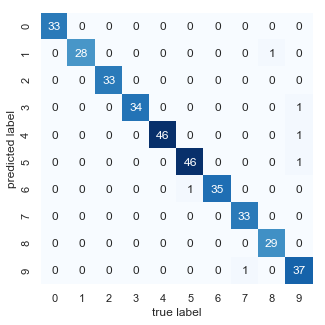

In [53]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

In [54]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

   micro avg       0.98      0.98      0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

